# Visualizatiton

In [61]:
%run ../oscilloscope/script/dataset.py

from keras import layers
from keras import models

DATASET_FOLDER = "../dataset/data_restaurant"
SAVED_MODEL = "../dataset/data_restaurant/key_word_detection_cnn_20190325053252.h5"

In [62]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, shuffle=False)['mfsc']

model = models.load_model(SAVED_MODEL)
ds.class_labels

['umai',
 'mazui',
 'oishii',
 'silence',
 'others',
 'a',
 'i',
 'o',
 'sushi',
 'sashimi',
 'gyouza',
 'hashi',
 'spoon',
 'fork',
 'syouyu',
 'sakana',
 'niku',
 'gohan']

In [63]:
train_data, train_labels = ds.reshape_per_class(train_data, train_labels)

'sushi'

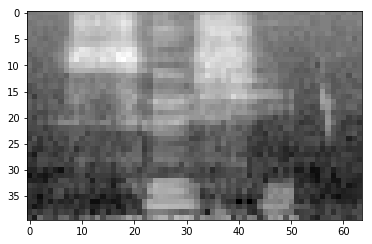

In [85]:
l = ds.class_labels.index('sushi')
image_number = 16

plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')
plt.savefig('input.png')
ds.class_labels[np.argmax(train_labels[l, image_number])]

In [86]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[l])

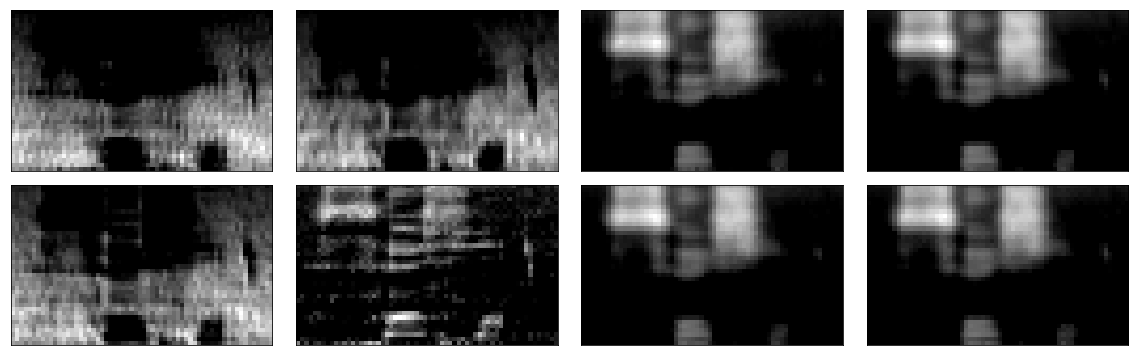

In [87]:
plot_layer(activations, image_number, 0, 4)
plt.savefig('layer0.png')

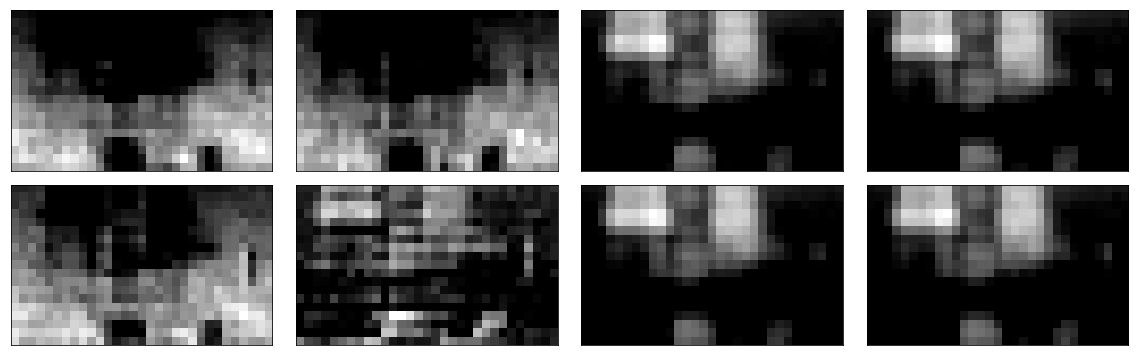

In [88]:
plot_layer(activations, image_number, 1, 4)
plt.savefig('layer1.png')

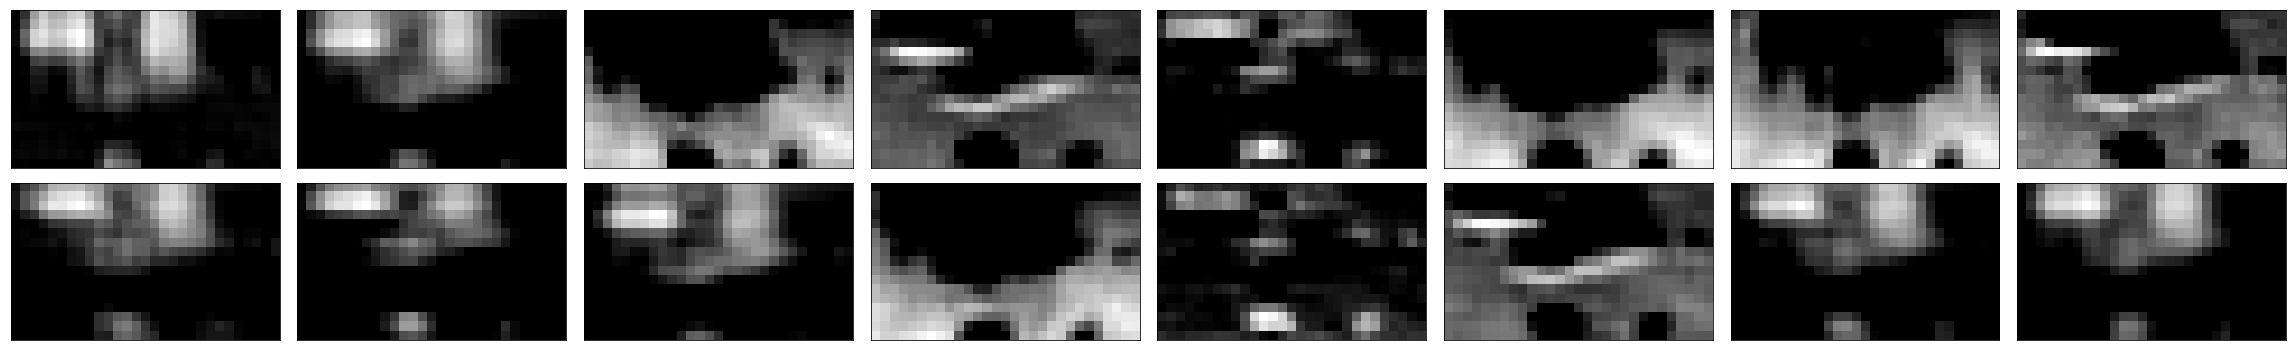

In [89]:
plot_layer(activations, image_number, 3, 8)
plt.savefig('layer3.png')

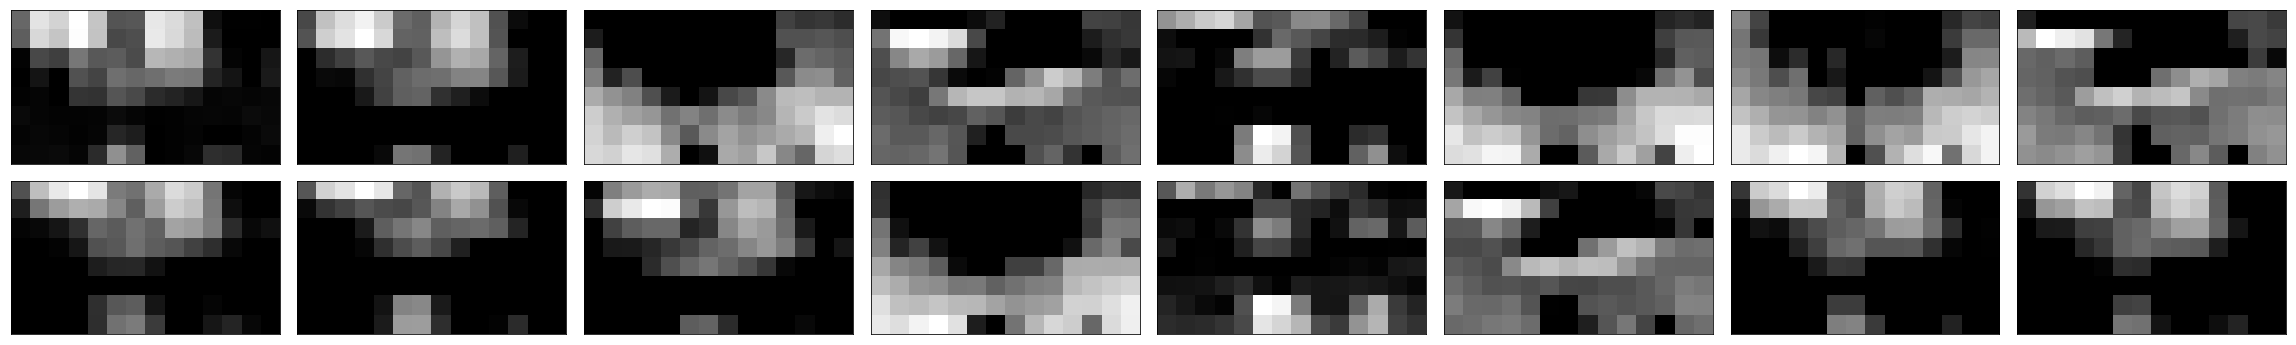

In [90]:
plot_layer(activations, image_number, 4, 8)
plt.savefig('layer4.png')

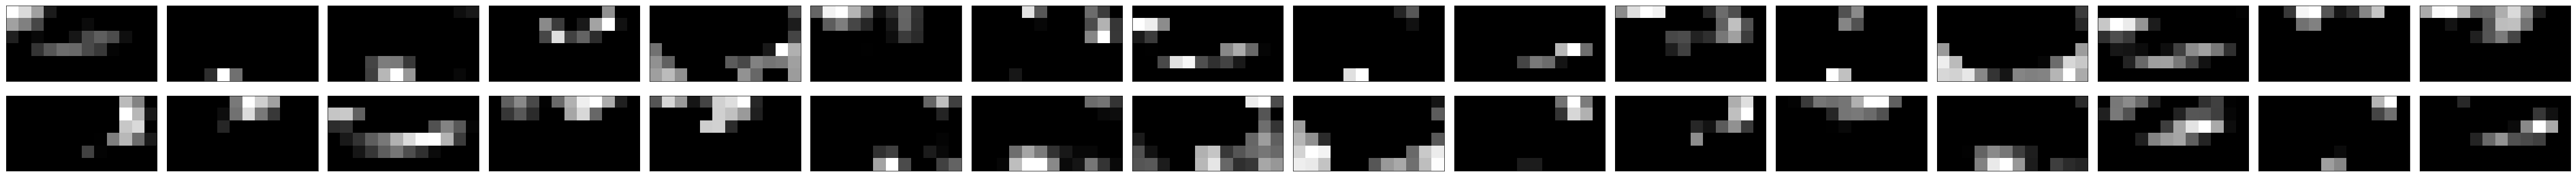

In [91]:
plot_layer(activations, image_number, 6, 16)
plt.savefig('layer4.png')

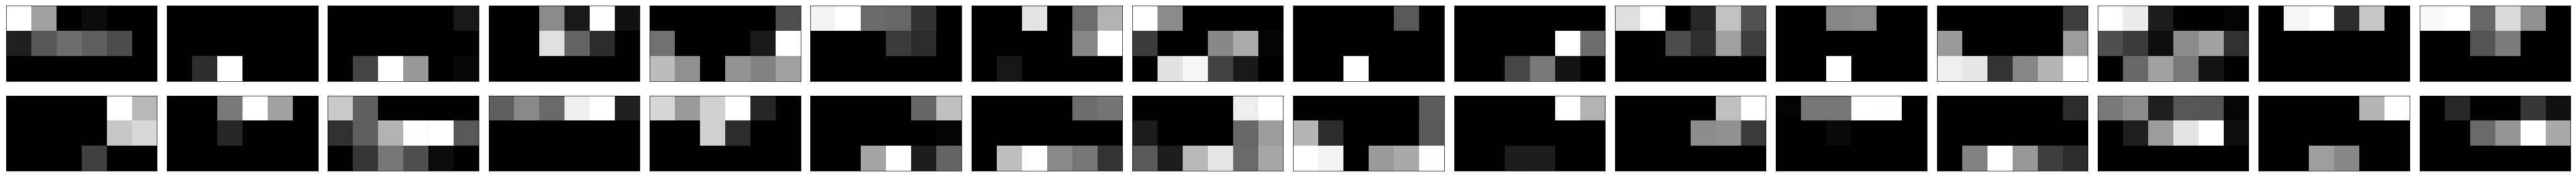

In [92]:
plot_layer(activations, image_number, 7, 16)
plt.savefig('layer5.png')